# Statistical methods in AI

## Assignment 2

### Problem 4.1:
### Image Alignment

In this assignment, we will attempt to align a given data of images to match the alignment of a given image template. Let us have a look at the images that we have been given. To do that, let us borrow the code used in part one of the assignment to get our images in the form of an array. 

In [110]:
import numpy as np
import os
from random import randrange
from matplotlib import pyplot as plt
from PIL import Image
import pandas as pd
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import cv2

In [111]:
opt = {
    'image_size': 32,
    'is_grayscale': True, # Changed to True as our dataset consists of grayscale images
    'val_split': 0.75
}

We will make some modifications to the code given to us for extracting images. We will apply some given rotation to the image for reasons which will be specified in the algorithm explaind later in the notebook.

### Step 1:

Make functions to get the image in the form of an array of pixel values to perform the computations on.

In [112]:
def load_image(path):
    im = Image.open(path).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = np.array(im)
    im = im/256
    return im

def display_images(imgs, row=1,col=2,w=32,h=32, n = 0):
    fig=plt.figure(figsize=(8, 8))
    if n == 0:
        m = row*col + 1
    else:
        m = n
    for i in range(1, m):
        img = imgs[i-1]
        fig.add_subplot(row, col, i)
        
        if opt['is_grayscale']:
            plt.imshow(img , cmap='gray') 
        else:
            plt.imshow(img)
        
        plt.axis('off')
    plt.show()

def load_data(dir_path):
    image_list = [] # removing the classes as they are not required
    for filename in sorted(os.listdir(dir_path)):
        if filename.endswith(".png"):
            im = load_image(os.path.join(dir_path,filename))
            image_list.append(im)
        else:
            continue
    image_list = np.array(image_list)


    return image_list

In [113]:
dirpath = 'KIMIA_dataset/'
img = load_data(dirpath)
print(img.shape)

(99, 32, 32)


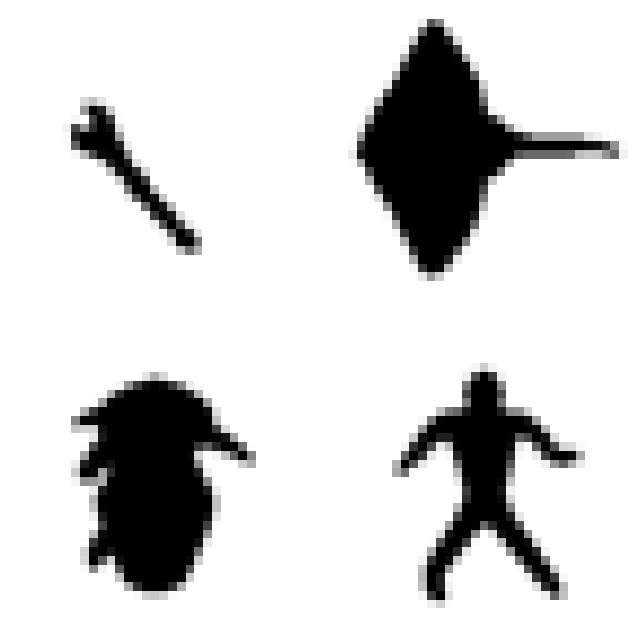

In [114]:
ind = np.random.randint(0,img.shape[0], 6)
display_images(img[ind,...], row=2)

### Step 2:

Now we compute the best eigenvector along which the variance is retained using PCA. This axis will be along the head and tail of the image as that is more most of the image is concentrated.

In [115]:
eigen_vecs = []

for i in range(99):
    im = img[i]
    pca = PCA(1)
    im = pca.fit_transform(im)
    eigen_vecs.append(pca.components_)


### Step 3:

Write the function which computes the angle between 2 vectors so we can compute the angle between the 2 eigen vectors obtained from the 2 images to get the angle between the images.

In [116]:
def get_angle(vec1, vec2):
    dot = np.dot(vec1, vec2.T)

    norm1 = np.linalg.norm(vec1)
    norm2 = np.linalg.norm(vec2)

    cosine = dot/(norm1*norm2)

    angle_rad = np.arccos(cosine)
    angle_degrees = np.degrees(angle_rad)
    return 180+angle_degrees

### Step 4:

Comput the eigen vector for template image to get its major axis

Original Image


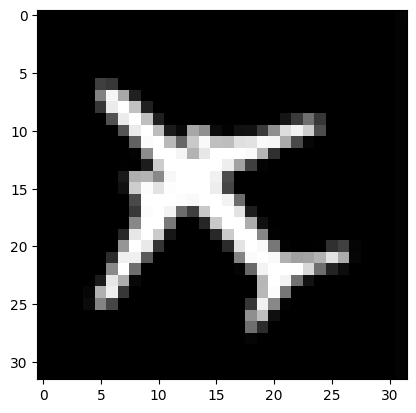

In [117]:
im = load_image('Templete_Input.png')

pca = PCA(1)
pca.fit(im)

print('Original Image')
plt.imshow(im, cmap='gray')

### Step 5:

Now, get the angle between all the eigenvectors to get the angle and rotate all the images to match that angle.

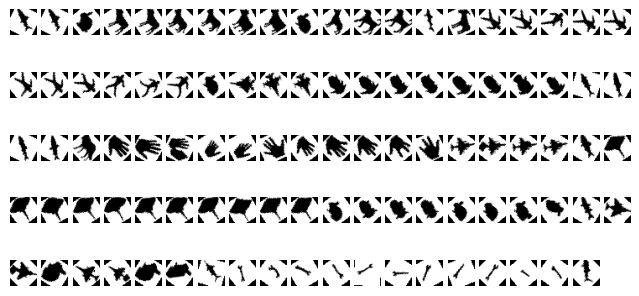

In [118]:
rot_im = []

for i, filename in enumerate(sorted(os.listdir(dirpath))):
    angle = get_angle(eigen_vecs[i], pca.components_)
    
    im = Image.open(os.path.join(dirpath, filename)).convert('L' if opt['is_grayscale'] else 'RGB')
    im = im.resize((opt['image_size'],opt['image_size']))
    im = im.rotate(angle[0][0])
    im = np.array(im)
    im = im/255
    rot_im.append(im)

rot_im = np.array(rot_im)

display_images(rot_im, col = 20, row = 10, n = 100)